In [1]:
setwd('/public/home/lyx/00.16S/00BR/00.bamboorat/phyloseq/')
list.files()

[1] "alpha_div.rds"                      "alpha_habitat.pdf"                 
 [3] "alpha_Observed_MRM.pdf"             "alpha_pgls.pdf"                    
 [5] "alpha_Shannon_MRM.pdf"              "alpha_species.pdf"                 
 [7] "ASV_species.xls"                    "ASV_table.tsv"                     
 [9] "beta_div.rds"                       "bray_distance.xls"                 
[11] "bray_MRM.pdf"                       "bray_pcoa.pdf"                     
[13] "bray_pgls.pdf"                      "dna-sequences.fasta"               
[15] "Enterotypes_bamboo.pdf"             "filtered-table.tsv"                
[17] "genus_lefse_Bathyergidae.pdf"       "genus_lefse_habitat.pdf"           
[19] "genus_lefse_Spalacidae.pdf"         "host_tree_exp_dist.RDS"            
[21] "host_tree_exp.nwk"                  "host_tree.nwk"                     
[23] "host_tree.pdf"                      "host_tree.png"                     
[25] "init.R"                             "metadata.txt"                      
[27] "otu_genus.xls"                      "otu_phylum.xls"                    
[29] "OTU_species.xls"                    "phyloseq_phylum_itol-phylumbar.txt"
[31] "phyloseq.rds"                       "physeq_diet-itol.txt"              
[33] "physeq_gut-itol.txt"                "physeq_life_style-itol.txt"        
[35] "physeq_sample_type-itol.txt"        "rarefied_ASV.xls"                  
[37] "rep.fa"                             "rep.xls"                           
[39] "rooted_tree.nwk"                    "taxa.xls"                          
[41] "taxonomy.tsv"                       "upgma_bray_species.pdf"

In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(phyloseq)
library(vegan)
library(ggrepel)
library(MicrobiotaProcess)
library(ggthemes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offsprin

In [3]:
#读取phyloseq
phyloseq <- readRDS("phyloseq.rds")
phyloseq
#相对丰度标准化
#physeq_ras = transform_sample_counts(phyloseq, function(x) x / sum(x) )
#physeq_ras

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4858 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 4858 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4858 tips and 4857 internal nodes ]

In [4]:
####import otu####
otu = phyloseq %>%
    otu_table %>%
    as.matrix %>%
    t() %>% 
    as.data.frame()
head(otu)

####import metadata####
metadata = phyloseq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame()
head(metadata)

,ASV4221,ASV5622,ASV586,ASV5507,ASV4055,ASV5428,ASV2396,ASV5716,ASV3034,ASV2578,⋯,ASV465,ASV1841,ASV1725,ASV3667,ASV1655,ASV4840,ASV5008,ASV4026,ASV2858,ASV1903
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BMR1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,19,0,0,0,0,0,0
BMR2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
BMR3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
BMR4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
BMR5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,9,0,0,0,0,0,0
BMR6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,Sampleid,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BMR1,BMR1,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR2,BMR2,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR3,BMR3,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR4,BMR4,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR5,BMR5,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR6,BMR6,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


此种方法计算的beta diversity index包括本身的距离值0

In [5]:
# 基于OTU表的加权与非加权距离计算
bray<-distance(phyloseq,method = 'bray') %>% as.matrix()
write.table(bray,file = "bray_distance.xls",sep="\t",quote = F)
# unifrac <-distance(phyloseq,method = 'unifrac') %>% as.matrix()
# write.table(unifrac,file = "unifrac_distance.xls",sep="\t",quote = F)
# wunifrac <-distance(phyloseq,method = 'wunifrac') %>% as.matrix()
# write.table(wunifrac,file = "wunifrac_distance.xls",sep="\t",quote = F)
bray %>% as.vector %>% summary
# unifrac %>% as.vector %>% summary
# wunifrac %>% as.vector %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9858  0.9990  0.9299  1.0000  1.0000 

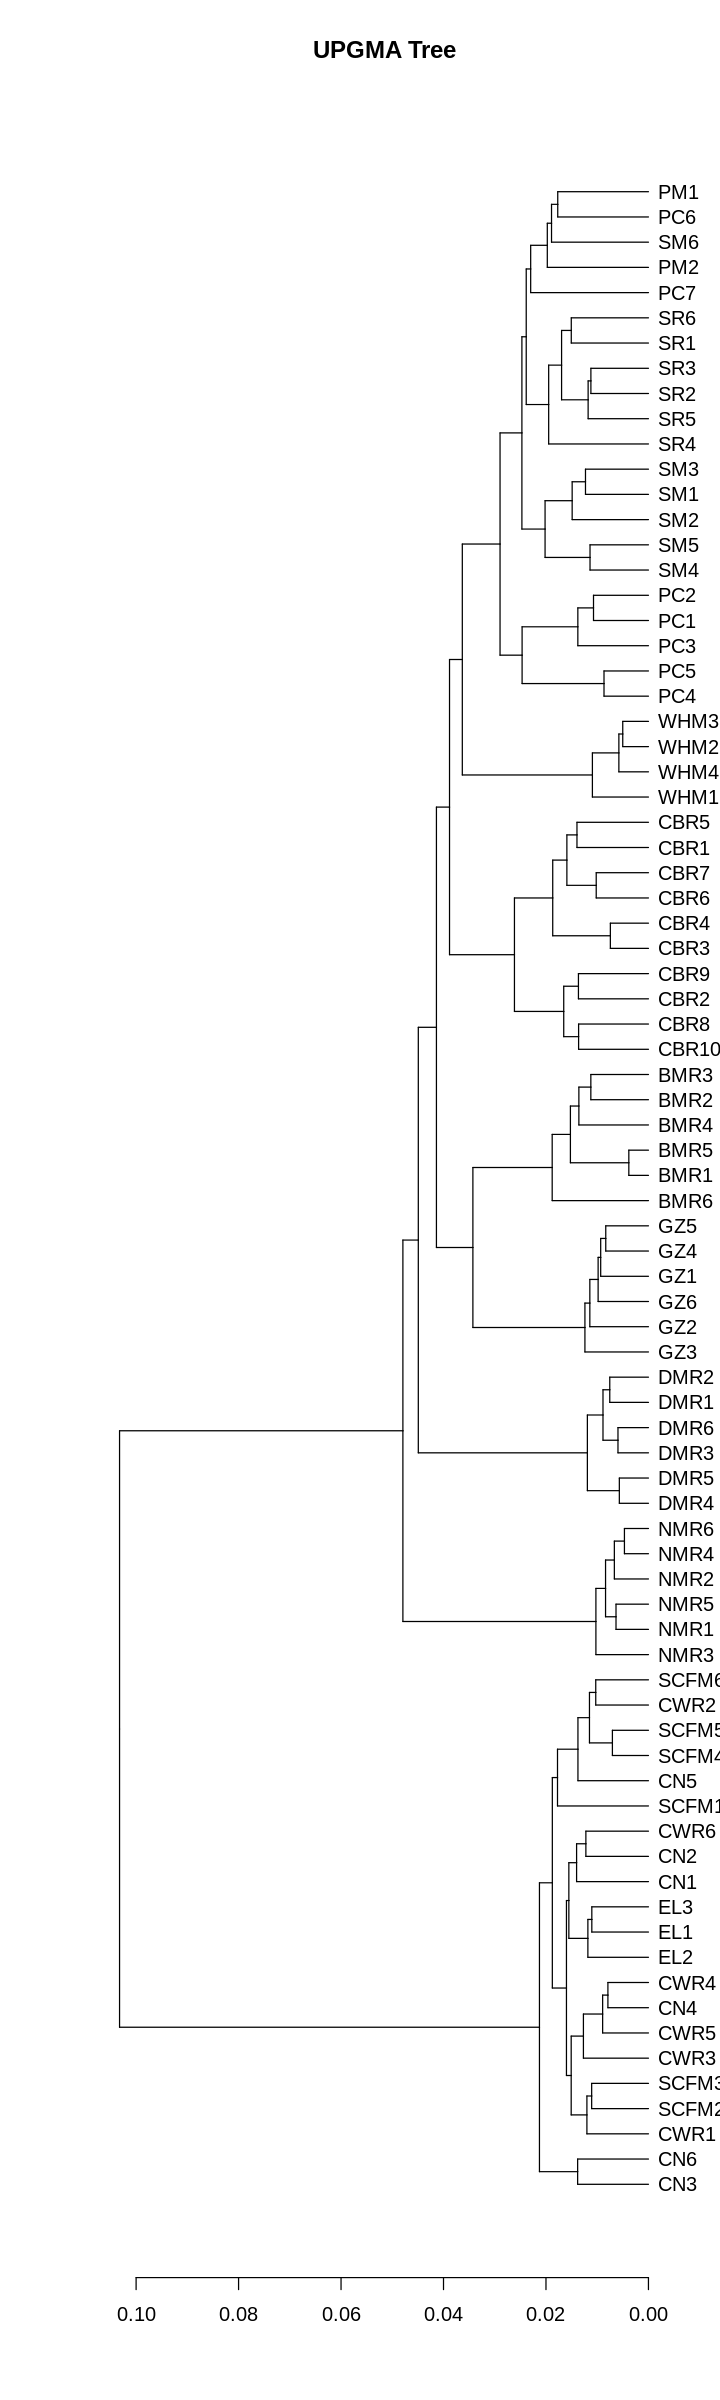

In [7]:
####样本聚类树####
# bray=vegdist(bray,diag=TRUE, upper=TRUE, p=2)
hclust=hclust(bray, method="average")
tree=as.dendrogram(hclust)
options(repr.plot.width=6, repr.plot.height=20)
plot(tree, horiz=TRUE, main="UPGMA Tree")

# 显示节点,ggtree画树
# library(ggtree)
# data=fortify(tree)
# p <- ggtree(tree) + 
#     geom_nodepoint(color="black", alpha = 1, size = 2) +
#     geom_tiplab(size=3, color="black") +
#     xlim_tree(max(data$x)*1.4)
# p

In [11]:
####物种聚类树####
asv <- read.table("rarefied_ASV.xls",header=T,sep="\t",check.names = F) %>% as.data.frame()
head(asv)

,ASV,BMR1,BMR2,BMR3,BMR4,BMR5,BMR6,CBR1,CBR10,CBR2,⋯,SR1,SR2,SR3,SR4,SR5,SR6,WHM1,WHM2,WHM3,WHM4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ASV4221,0,0,0,0,0,0,0,0,0,⋯,0,3,0,0,0,0,0,0,0,0
2,ASV5622,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,ASV586,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,ASV5507,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,ASV4055,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,ASV5428,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
metadata <- read.table("metadata.txt",header = T,
                         sep="\t",check.names = F,row.names = 1)

In [13]:
asv <- asv %>% 
    gather(Sampleid,value,-ASV) %>% 
    inner_join(metadata,c('Sampleid')) %>% 
    as.data.frame()
head(asv)

,ASV,Sampleid,value,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ASV4221,BMR1,0,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
2,ASV5622,BMR1,0,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
3,ASV586,BMR1,0,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
4,ASV5507,BMR1,0,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
5,ASV4055,BMR1,0,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
6,ASV5428,BMR1,0,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


In [26]:
asv_species <- asv %>% 
    select(Species,value,ASV) %>% 
    group_by(Species,ASV) %>% 
    summarise(value=median(value)) %>% 
    spread(Species,value) %>% 
    as.data.frame()
head(asv_species)
write.table(asv_species,file = "ASV_species.xls",sep="\t",row.names = F,quote = F)

`summarise()` has grouped output by 'Species'. You can override using the `.groups` argument.


,ASV,Apodemus draco,Coendou prehensilis,Dolichotis patagonum,Eospalax cansus,Fukomys damarensis,Heterocephalus glaber,Leopoldamys edwardsi,Mus musculus,Nannospalax leucodon,Niviventer confucianus,Niviventer fulvescens,Rhizomys sinensis,Scaptochirus moschatus,Sorex araneus
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ASV1,0,0,3,0,0,0,0,6914.5,10.5,0,0,1.5,12.5,0
2,ASV10,642,0,0,0,0,0,32,0.0,0.0,137,186,0.0,0.0,0
3,ASV100,0,12,0,0,0,0,0,0.0,0.0,0,0,0.0,201.5,1
4,ASV1000,0,0,0,0,0,0,0,0.0,0.0,0,1,0.0,0.0,0
5,ASV1001,0,0,0,0,0,0,0,13.5,0.0,0,0,0.0,0.0,0
6,ASV1002,0,0,0,0,20,0,0,0.0,0.0,0,0,0.0,0.0,0


In [27]:
####ASV_species_bray####
ASV_species_bray <- read.csv("ASV_species.xls",sep = "\t",header = T,
                     row.names = 1,check.names = F) %>% t() %>% as.data.frame()
head(ASV_species_bray)

,ASV1,ASV10,ASV100,ASV1000,ASV1001,ASV1002,ASV1003,ASV1006,ASV1008,ASV1009,⋯,ASV988,ASV99,ASV991,ASV992,ASV993,ASV994,ASV995,ASV996,ASV998,ASV999
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Apodemus draco,0,642,0,0,0,0,0,0,0,0.0,⋯,0,0,0.0,0,0,0,0.0,0,2,0
Coendou prehensilis,0,0,12,0,0,0,0,0,0,1.0,⋯,0,0,0.0,0,3,0,1.0,0,0,0
Dolichotis patagonum,3,0,0,0,0,0,31,0,0,0.5,⋯,0,7,0.0,0,0,0,10.5,0,0,0
Eospalax cansus,0,0,0,0,0,0,0,0,0,0.0,⋯,0,0,0.0,0,0,0,0.0,0,0,0
Fukomys damarensis,0,0,0,0,0,20,0,31,0,0.0,⋯,0,0,17.5,0,0,0,0.0,0,0,0
Heterocephalus glaber,0,0,0,0,0,0,0,0,0,0.0,⋯,0,0,0.0,0,0,0,0.0,0,0,0


In [28]:
####upgma####
otu_dist=vegdist(ASV_species_bray,diag=TRUE, upper=TRUE, p=2)
hclust=hclust(otu_dist, method="average")
tree=as.dendrogram(hclust)
pdf("upgma_bray_species.pdf")
options(repr.plot.width=4, repr.plot.height=8)
plot(tree, horiz=TRUE, main="UPGMA Tree")
dev.off()

png 
  2

In [18]:
# library(ggtree)
# data=fortify(tree)
# p <- ggtree(tree) + 
#     geom_nodepoint(color="black", alpha = 1, size = 2) +
#     geom_tiplab(size=3, color="black") +
#     xlim_tree(max(data$x)*1.4)
# options(repr.plot.width=5, repr.plot.height=8)
# p

此种方法计算的bray diversity index值不包括本身的距离

In [19]:
# calculating with phyloseq (in parallel)
methods = list(jaccard = 'jaccard', 
               bray = 'bray', 
               unifrac = 'unifrac',
               wunifrac = 'wunifrac')

beta_div = plyr::llply(methods, function(x) phyloseq::distance(phyloseq, method=x))
beta_div %>% length
                       
lapply(beta_div, function(x) x %>% as.vector %>% summary)
saveRDS(beta_div, file="beta_div.rds")  

[1] 4

$jaccard
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3471  0.9936  0.9996  0.9619  1.0000  1.0000 

$bray
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2100  0.9873  0.9991  0.9417  1.0000  1.0000 

$unifrac
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1854  0.7063  0.7379  0.7131  0.7679  0.8830 

$wunifrac
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0197  0.2437  0.3348  0.3247  0.4385  0.5485 


Calculate beta diversity based on phyloMantel

利用beta diversity index进行PCA、PCoA等聚类分析

Warning message:
“ggrepel: 65 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


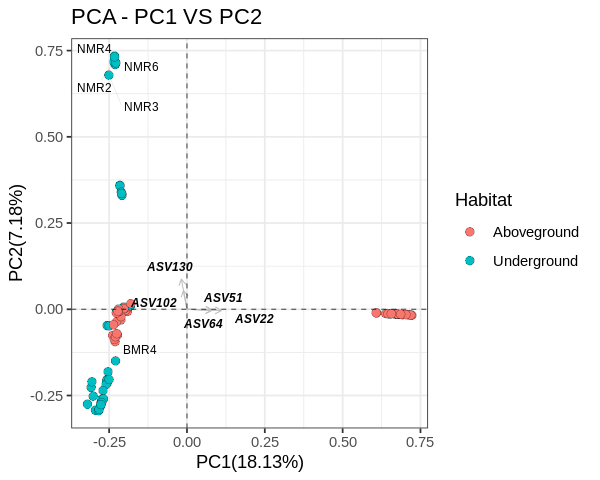

In [20]:
#PCA
pcares <- get_pca(obj=phyloseq, method="hellinger")
pcaplot <- ggordpoint(obj=pcares, biplot=TRUE, 
                      speciesannot=TRUE,poinsize=2,showsample=T,pc=c(1,2),factorNames=c("Habitat"))+theme_bw()
options(repr.plot.width=5, repr.plot.height=4)
pcaplot

In [8]:
# ####weighted-unifrac距离
# #ANOSIM
# anosim <- anosim(wunifrac,metadata$Digest_detail,permutations = 999)
# anosim
# plot(anosim)

# #PERMANOVA
# set.seed(1)
# adonis <- adonis2(wunifrac~metadata$Digest_detail,permutations = 999)
# adonis
# #PCoA-加权距离
# pcoares <- get_pcoa(obj=phyloseq,distmethod="wunifrac", method="hellinger")
# p1 <- ggordpoint(obj=pcoares, biplot=TRUE,speciesannot=TRUE, poinsize=2, pc = c(1,2),
#                        showsample=T, factorNames=c("Digest_detail"))+theme_bw()
# options(repr.plot.width=8, repr.plot.height=7)
# plot(p1)

# ####unweighted-unifrac距离
# #ANOSIM
# anosim <- anosim(unifrac,metadata$Digest_detail,permutations = 999)
# anosim
# plot(anosim)
# #PERMANOVA
# set.seed(1)
# adonis <- adonis2(unifrac~metadata$Digest_detail,permutations = 999)
# adonis
# #PCoA-非加权距离
# pcoares <- get_pcoa(obj=phyloseq,distmethod="unifrac", method="hellinger")
# p2 <- ggordpoint(obj=pcoares, biplot=TRUE,speciesannot=TRUE, poinsize=2, pc = c(1,2),
#                        showsample=T, factorNames=c("Digest_detail"))+theme_bw()
# options(repr.plot.width=8, repr.plot.height=7)
# plot(p2)


Call:
anosim(x = bray, grouping = metadata$Habitat, permutations = 999) 
Dissimilarity: user supplied square matrix 

ANOSIM statistic R: 0.07638 
      Significance: 0.008 

Permutation: free
Number of permutations: 999


Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
metadata$Habitat,1,1.335284,0.03716125,3.01045,0.001
Residual,78,34.596883,0.96283875,NA,NA
Total,79,35.932167,1.00000000,NA,NA


Warning message:
“ggrepel: 69 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


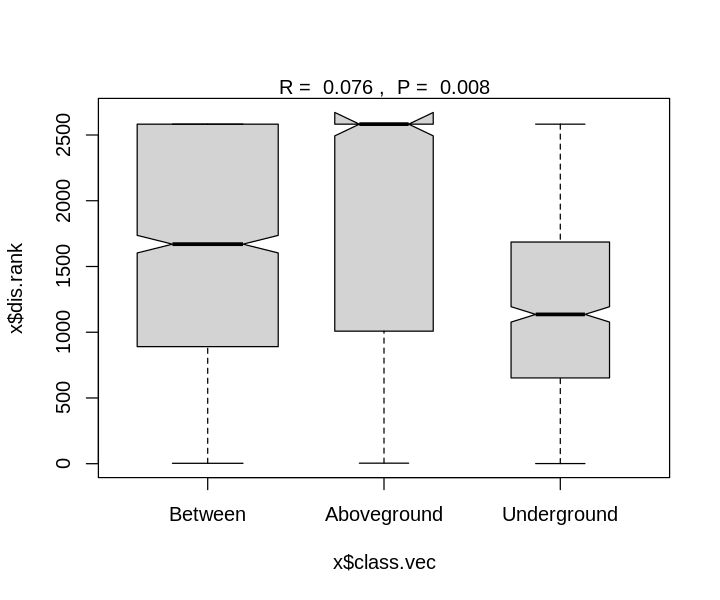

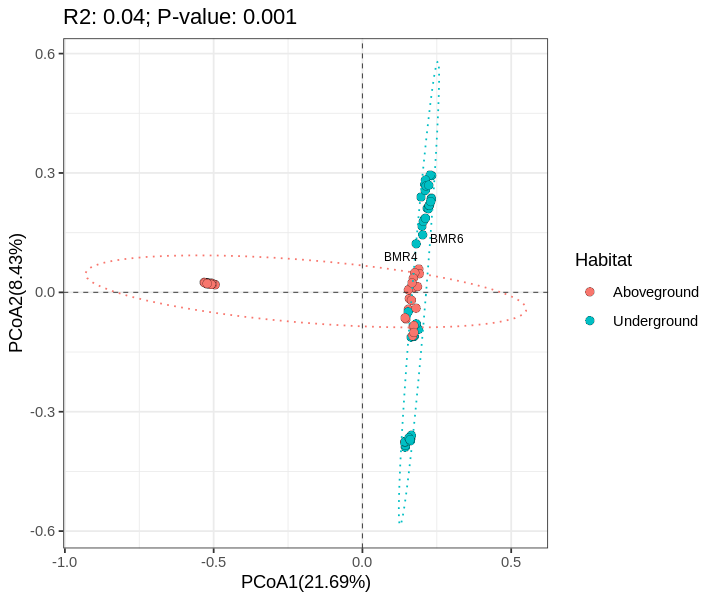

In [29]:
####bray-curtis距离
#ANOSIM
anosim <- anosim(bray,metadata$Habitat, permutations = 999)
anosim
options(repr.plot.width=6, repr.plot.height=5)
plot(anosim)
#PERMANOVA
set.seed(1)
adonis <- adonis2(bray ~ metadata$Habitat, permutations = 999, method="bray")
adonis
adonis <- paste0("R2: ",round(adonis$R2,2), "; P-value: ", adonis$`Pr(>F)`)

#PCoA
pcoares <- get_pcoa(obj=phyloseq,distmethod="bray", method="hellinger")
p3 <- ggordpoint(obj=pcoares, poinsize=2, pc = c(1,2),
                       showsample=T, factorNames=c("Habitat"),ellipse=T)+
            labs(title =adonis,fill="Habitat")+theme_bw()
options(repr.plot.width=6, repr.plot.height=5)
plot(p3)
# ggsave("bray_pcoa.pdf",width = 6,height = 5,dpi = 1000)

In [23]:
####基于vegan进行PCOA聚类####
####bray curtis####
ko_dist=vegdist(otu,diag=TRUE, upper=TRUE,method = "bray") %>% as.matrix()

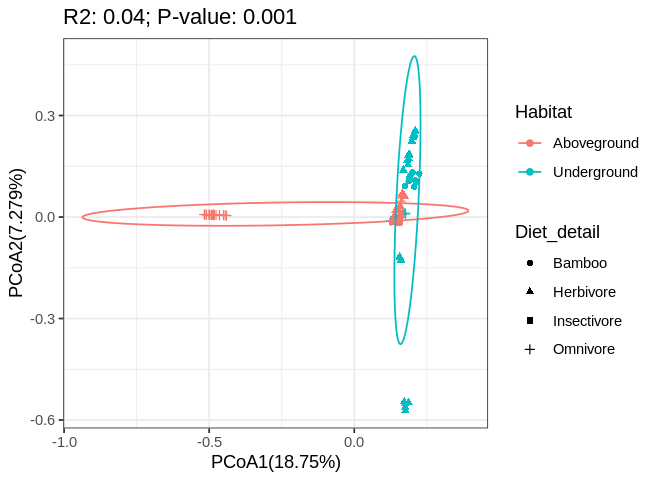

In [24]:
# PCoA
pcoa <- cmdscale(ko_dist, eig = TRUE)
plot_data <- data.frame({pcoa$point})[1:2]
plot_data$Sampleid <- rownames(plot_data)
names(plot_data)[1:2] <- c('PCoA1', 'PCoA2')
eig = pcoa$eig
plot_data <- merge(plot_data,metadata, by = 'Sampleid', all.x = TRUE)

p <- ggplot(data = plot_data, aes(x=PCoA1, y=PCoA2, 
                                  color=Habitat), size=2)+
    geom_point(aes(shape=Diet_detail))+
    stat_ellipse(level = 0.9)+
    labs(x=paste("PCoA1(", format(100 * eig[1] / sum(eig), digits=4), "%)", sep=""),
       y=paste("PCoA2(", format(100 * eig[2] / sum(eig), digits=4), "%)", sep=""))+
    theme_bw()+
#     geom_text_repel(aes(x=PCoA1, y=PCoA2, label=Sampleid),size=2)+
    labs(title = adonis)
options(repr.plot.width=5.5, repr.plot.height=4)
plot(p)
ggsave("bray_pcoa.pdf",width = 6,height = 5,dpi = 1000)

Warning message:
“ggrepel: 65 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


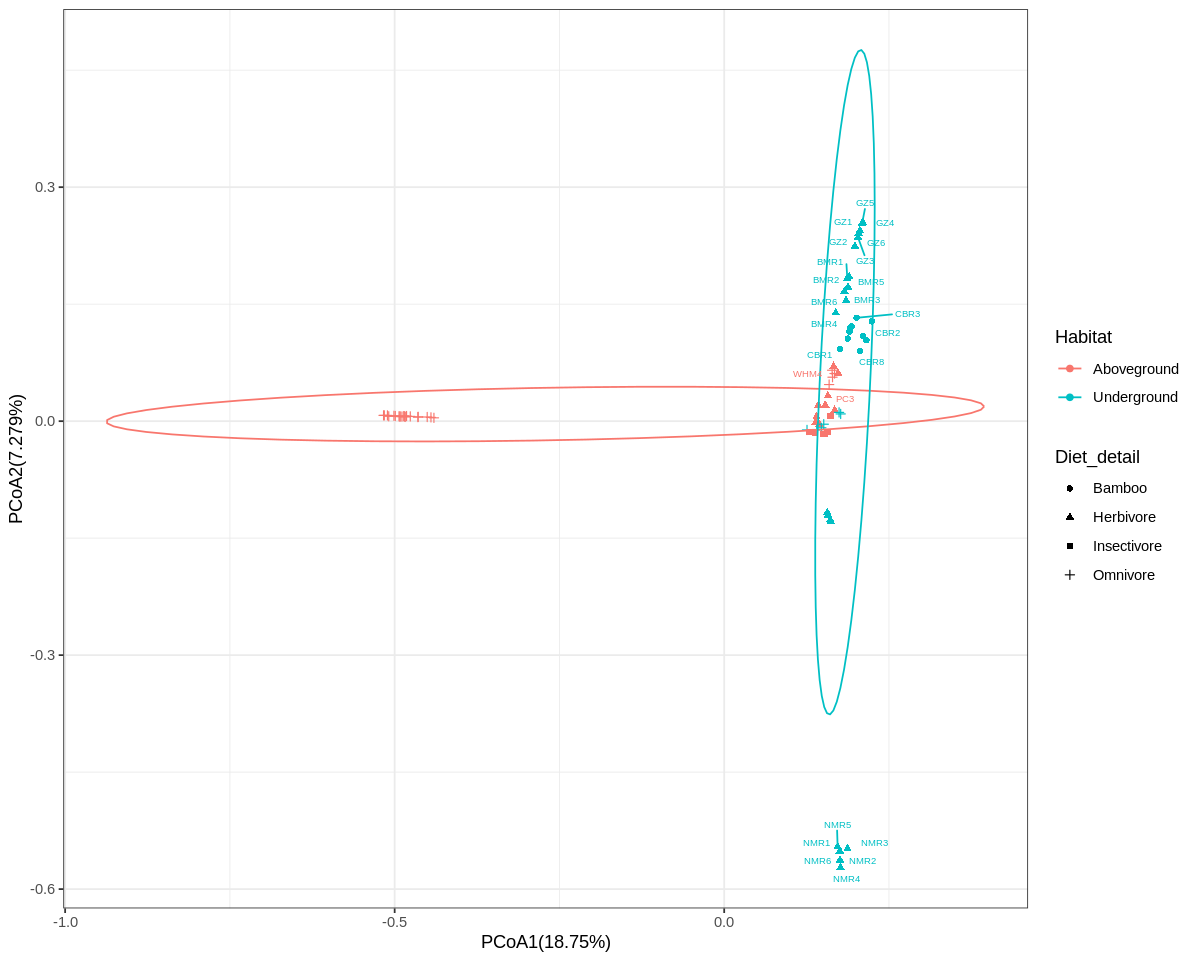

In [25]:
# PCoA
p <- ggplot(data = plot_data, aes(x=PCoA1, y=PCoA2, 
                                  color=Habitat), size=2)+
    geom_point(aes(shape=Diet_detail))+
    stat_ellipse(level = 0.9)+
    labs(x=paste("PCoA1(", format(100 * eig[1] / sum(eig), digits=4), "%)", sep=""),
       y=paste("PCoA2(", format(100 * eig[2] / sum(eig), digits=4), "%)", sep=""))+
    theme_bw()+geom_text_repel(aes(x=PCoA1, y=PCoA2, label=Sampleid),size=2)
options(repr.plot.width=10, repr.plot.height=8)
plot(p)

The color has been set automatically, you can reset it 
            manually by adding scale_fill_manual(values=yourcolors)

The color has been set automatically, you can reset it 
            manually by adding scale_fill_manual(values=yourcolors)



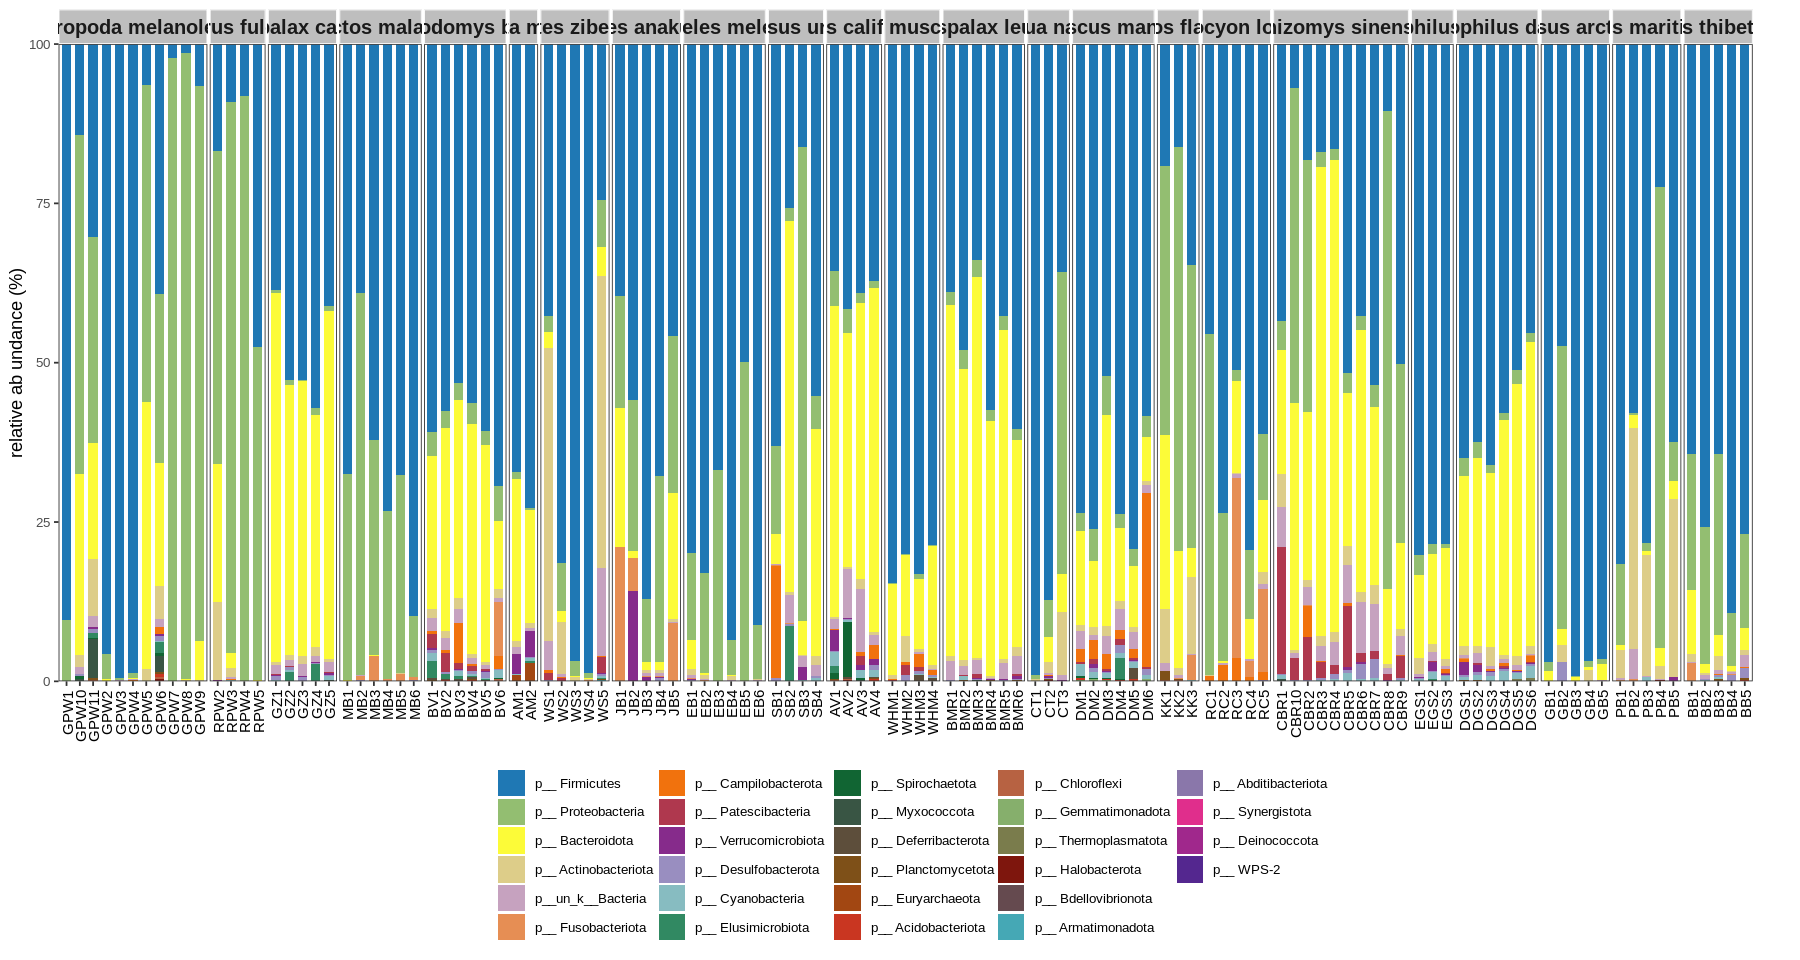

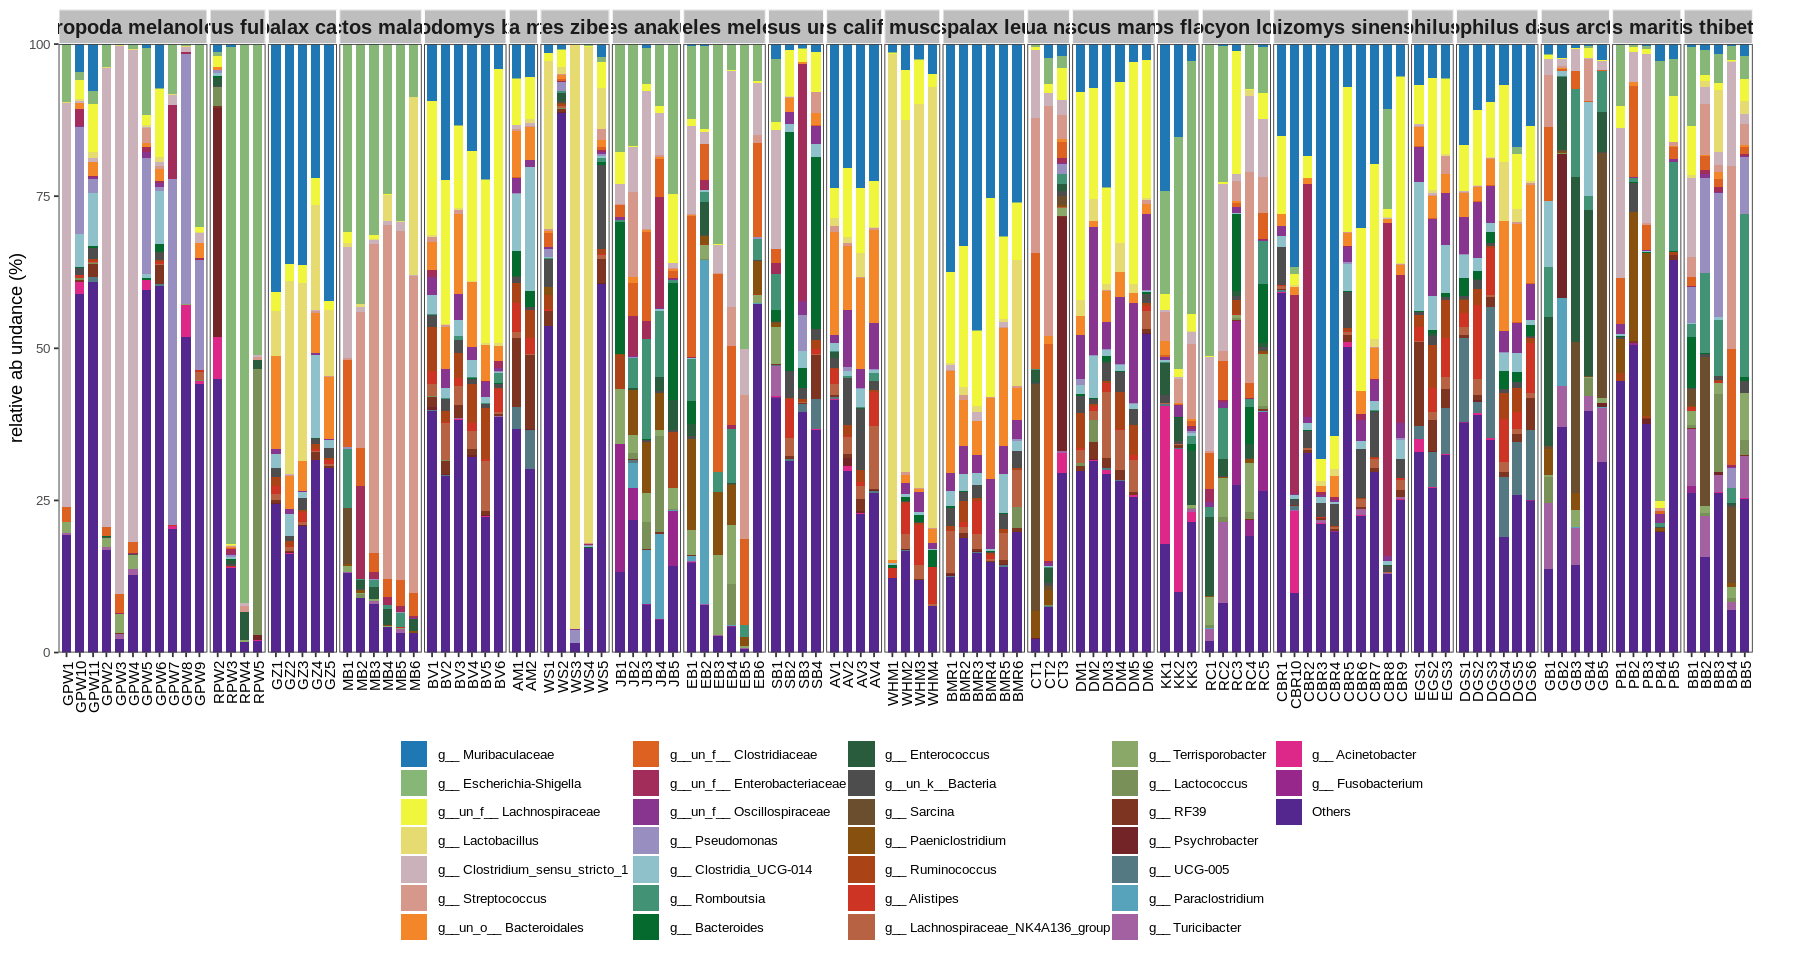

In [5]:
# 物种组成(门水平)
# phyloseq@sam_data[["group"]]<-factor(phyloseq@sam_data[["group"]],levels=c("GP","BB","MB","GB","PB","RP",
#                                                              "RC","CT","KK","JB","EB","EO","WS","CBR",
#                                                              "BMR","GZ","WHM","DM"))
phytax <- get_taxadf(obj=phyloseq, taxlevel=2)
phybar <- ggbartax(obj=phytax,facetNames="Species",count=FALSE) +
    xlab(NULL) + ylab("relative ab undance (%)")+
    theme(axis.text.x=element_text(face="plain",color="black",hjust=0.8,vjust=0.6,size=9,angle=90))+
    theme(legend.position="bottom")
options(repr.plot.width=15, repr.plot.height=8)
phybar

# 物种组成（属水平）
phytax <- get_taxadf(obj=phyloseq, taxlevel=6)
phybar <- ggbartax(obj=phytax,facetNames="Species",count=FALSE) +
    xlab(NULL) + ylab("relative ab undance (%)")+
    theme(axis.text.x=element_text(face="plain",color="black",hjust=0.8,vjust=0.6,size=9,angle=90))+
    theme(legend.position="bottom")
options(repr.plot.width=15, repr.plot.height=8)
phybar

In [ ]:
####提取某个水平的物种丰度表####
# genus <- phyloseq::otu_table(phytax) %>% as.data.frame() %>% t()
# genus
# write.table (genus,file ="otu_genus.xls", sep ="\t", row.names = T) 

In [ ]:
# PCoA
# pcoa <- cmdscale(genus_bray, eig = TRUE)
# plot_data <- data.frame({pcoa$point})[1:2]
# plot_data$sampleid <- rownames(plot_data)
# names(plot_data)[1:2] <- c('PCoA1', 'PCoA2')
# eig = pcoa$eig
# plot_data <- merge(plot_data,metadata, by = 'sampleid', all.x = TRUE)

# p4 <- ggplot()+
#     geom_point(data = plot_data, aes(x=PCoA1, y=PCoA2, color=group), size=3)+
#     labs(x=paste("PCoA 1 (", format(100 * eig[1] / sum(eig), digits=4), "%)", sep=""),
#        y=paste("PCoA 2 (", format(100 * eig[2] / sum(eig), digits=4), "%)", sep=""))+
#     theme_bw()+geom_text_repel(data = plot_data, aes(x=PCoA1, y=PCoA2, label=sampleid),size=2)
# options(repr.plot.width=5, repr.plot.height=4)
# plot(p4)